# Objetivo do Projeto: Identificar clientes com probabilidade de abandonar um Banco

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv(os.path.join('Customer-Churn-Records.csv'))

## Análise Exploratória dos dados

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [20]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


### Verificar se o dataset está balanceado

In [8]:
print(df.shape)

(10000, 18)


In [10]:
df.isnull().values.any()

False

In [17]:
df['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

#### Nota: <br>
Com dataset não balanceado e partindo do pressuposto que se trata de um Banco mais ou menos recente, dado que a média de posse de produtos é de apenas 1,5 e o máximo de anos que um cliente é efetivamente cliente é 10, parece-me que  o custo de perder um cliente é maior que o custo de esforço de retenção. Isto é, os falsos negativos são mais problemáticos que os falsos positivos. Queremos então concentrarmo-nos em evitar os falsos negativos. Sugiro ultilizarmos as seguintes métricas de avaliação: Recall, F1-Score e AUC-ROC.

### Avaliar se existem variáveis que não interessam

Podemos desde logo retirar RowNumber, CustomerId, Surname por não acrescentarem informação relevante.

In [22]:
df.nunique()

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

In [39]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [3]:
categoricas=['Geography', 'Gender','HasCrCard','IsActiveMember','Exited','Complain','Satisfaction Score','Card Type']  # variáveis categóricas (inclui boolean)
numericas=['CreditScore', 'Age','Tenure',  'Balance', 'NumOfProducts', 'EstimatedSalary','Point Earned']    # variáveis numéricas

### Variáveis numéricas

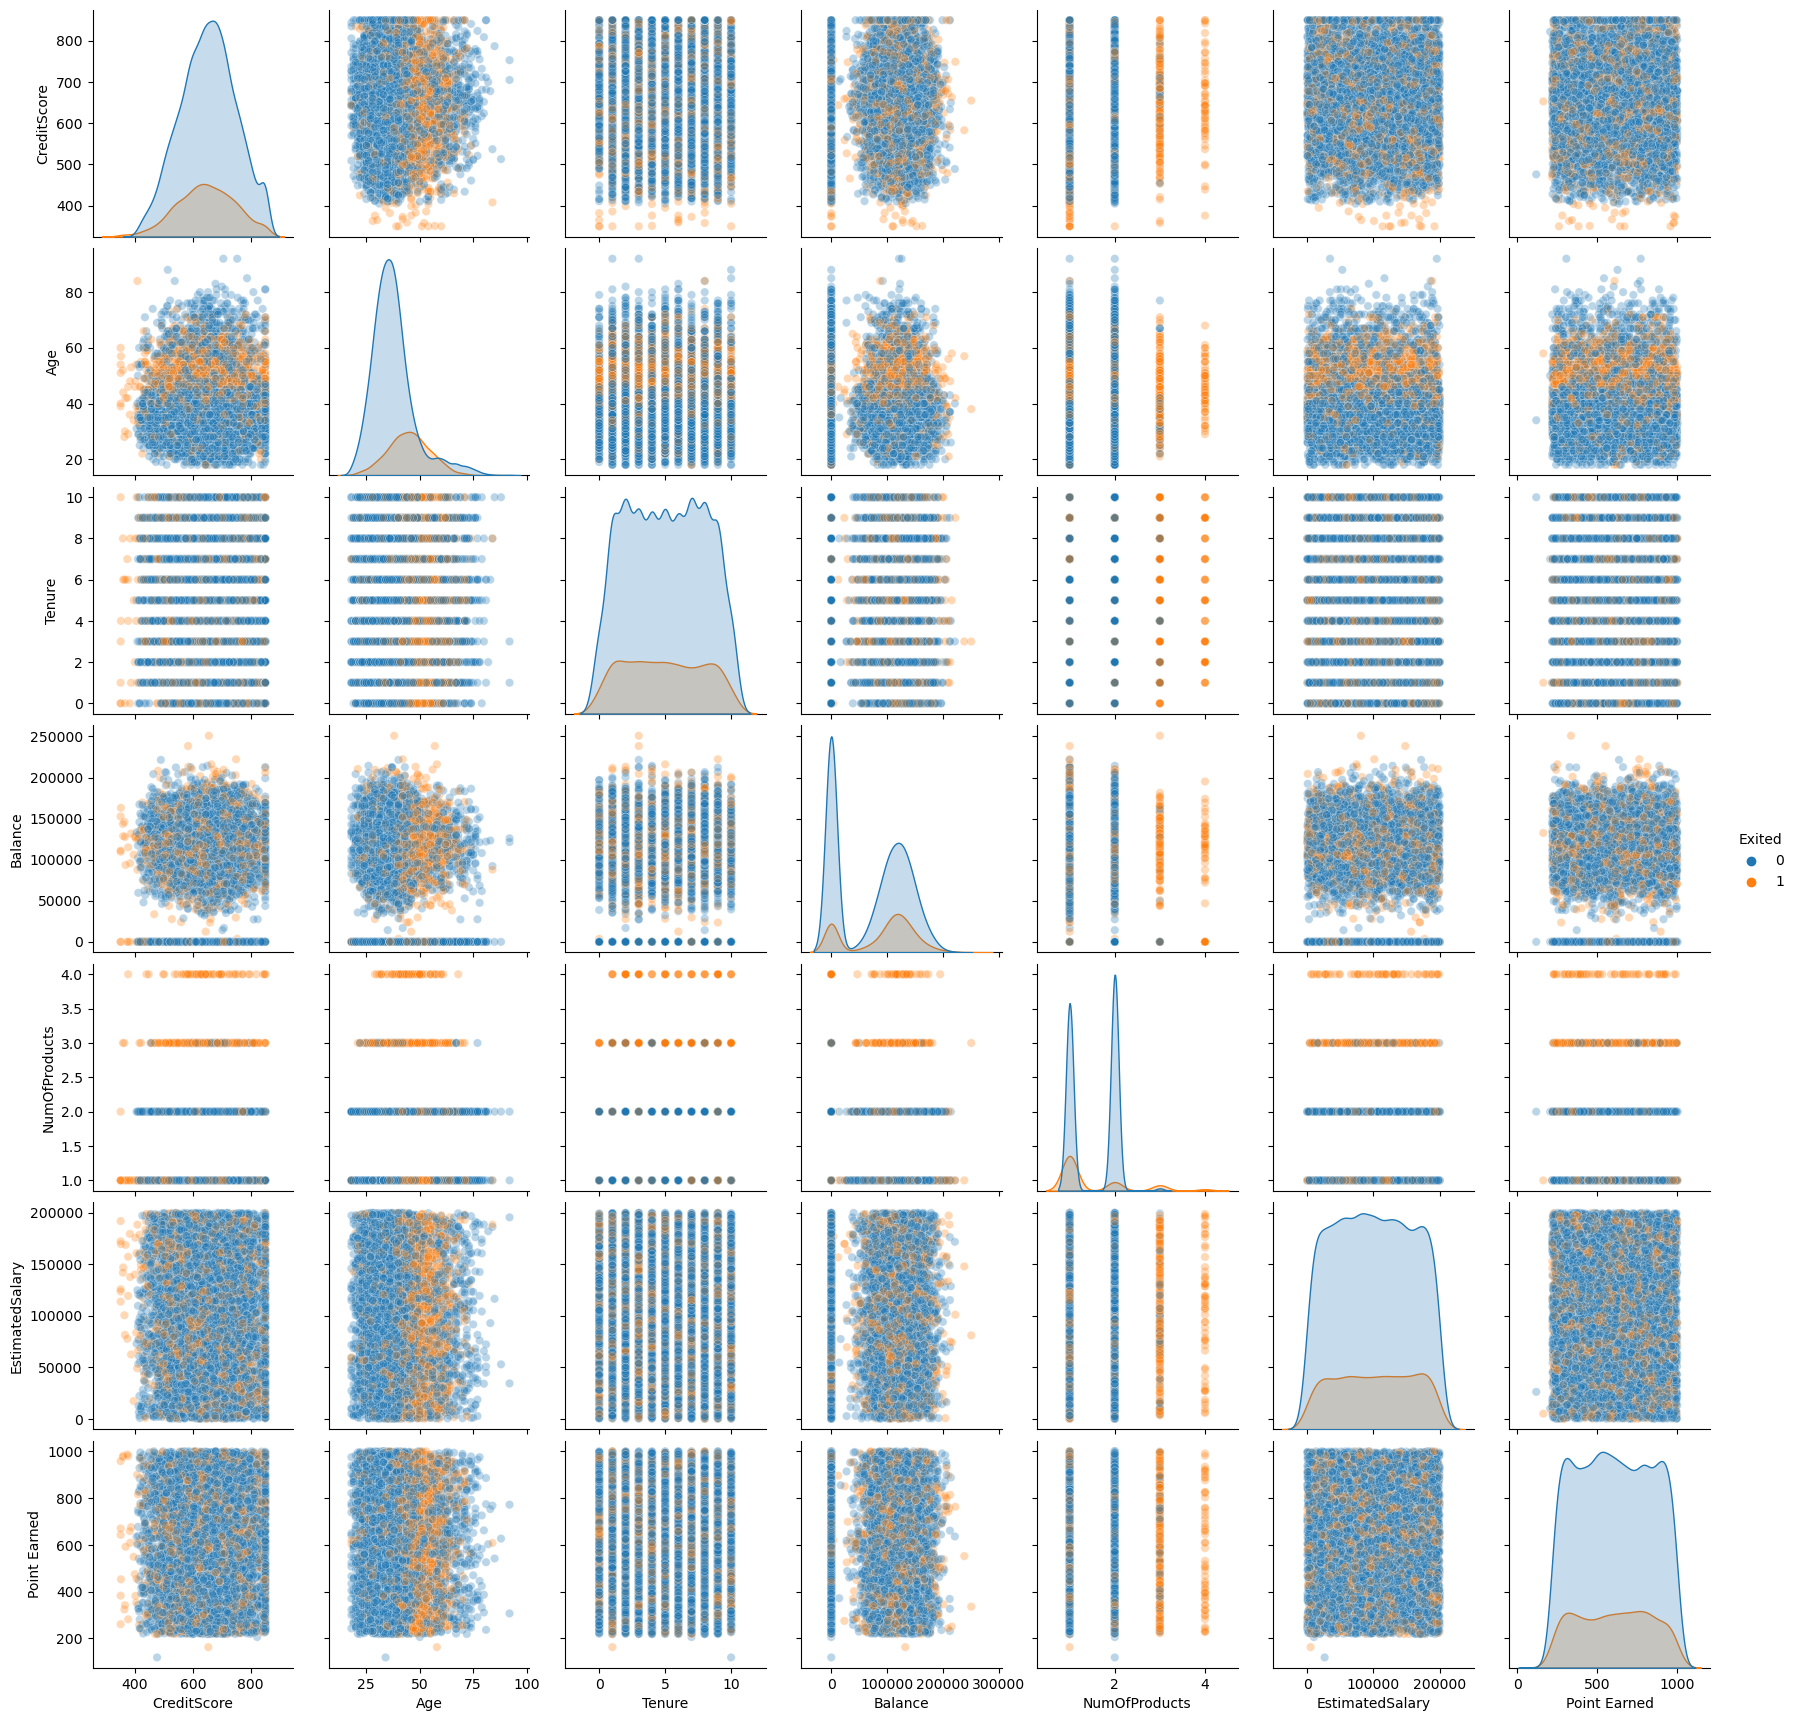

In [4]:
sns.pairplot(df[[*numericas, 'Exited']], hue='Exited', plot_kws={'alpha': 0.3})

#### Pela observação do pairplot diria que convém indagar a relação da Idade com a target, bem como creditscore e NumofProducts.

In [64]:
print(df.groupby('Exited')['Age'].describe())

         count       mean        std   min   25%   50%   75%   max
Exited                                                            
0       7962.0  37.408063  10.125957  18.0  31.0  36.0  41.0  92.0
1       2038.0  44.835623   9.759754  18.0  38.0  45.0  51.0  84.0


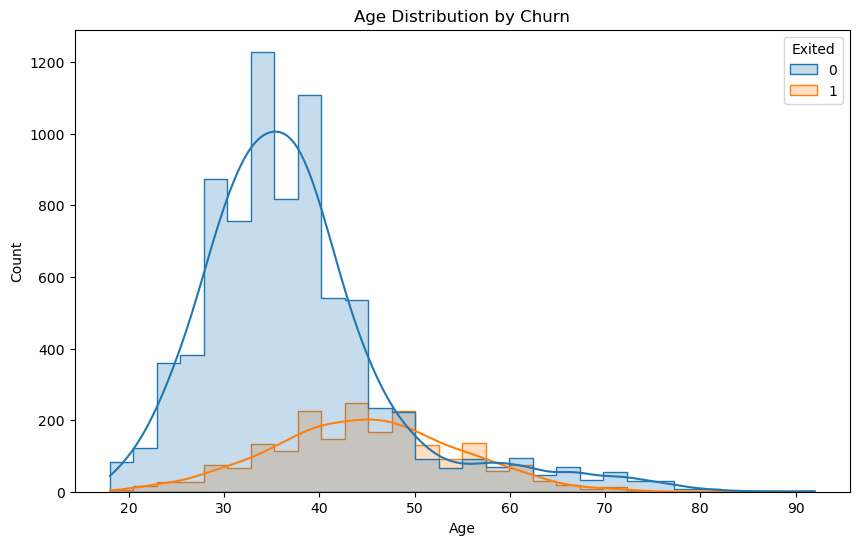

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Exited', kde=True, bins=30, element="step")
plt.title('Age Distribution by Churn')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

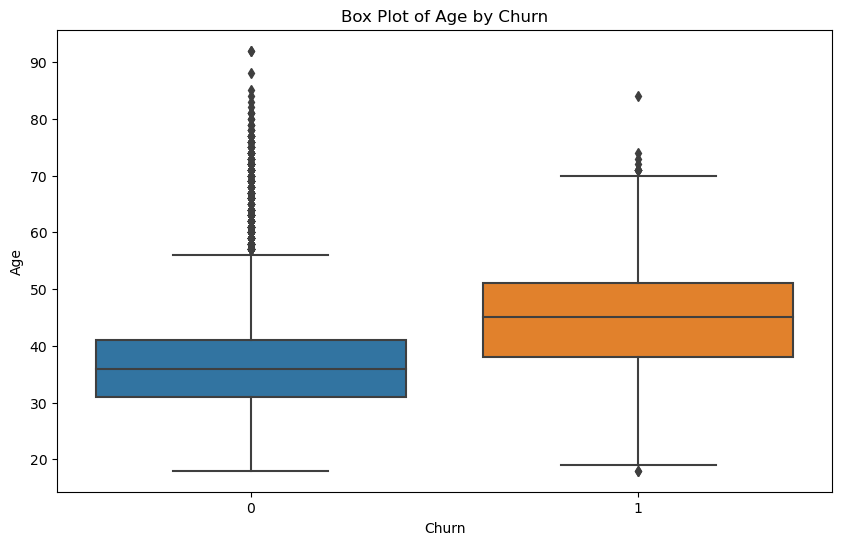

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Box Plot of Age by Churn')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.show()

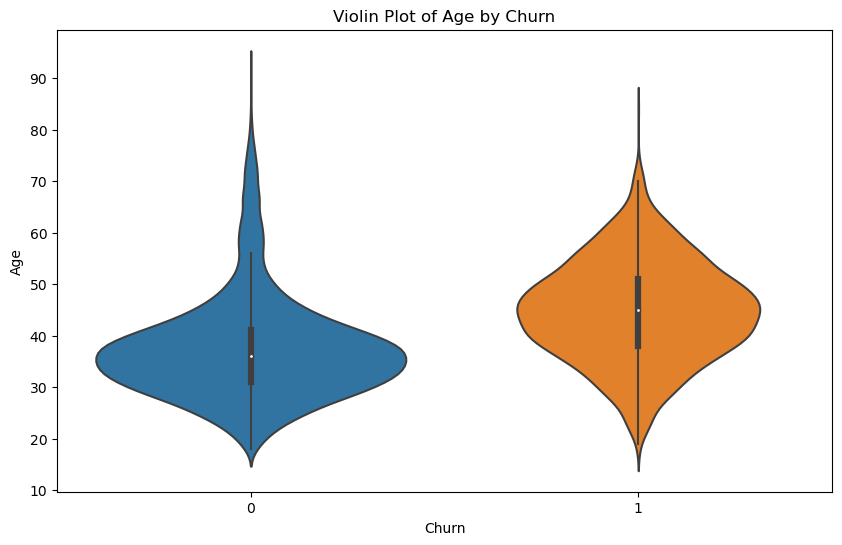

In [79]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Exited', y='Age', data=df)
plt.title('Violin Plot of Age by Churn')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.show()

In [69]:
from scipy.stats import ttest_ind
age_churned = df[df['Exited'] == 1]['Age']
age_not_churned = df[df['Exited'] == 0]['Age']

# Perform t-test
t_stat, p_val = ttest_ind(age_churned, age_not_churned)
print(f'T-Test: t-statistic = {t_stat}, p-value = {p_val}')

T-Test: t-statistic = 29.76379695489027, p-value = 1.3467162476197306e-186


#### Parece haver uma tendencia para clientes com mais de 50 anos sairem, indepentemente das outras variáveis.

In [71]:
print(df.groupby('Exited')['NumOfProducts'].describe())

         count      mean       std  min  25%  50%  75%  max
Exited                                                     
0       7962.0  1.544210  0.509542  1.0  1.0  2.0  2.0  3.0
1       2038.0  1.475466  0.801408  1.0  1.0  1.0  2.0  4.0


In [74]:
NumOfProducts_x = df.groupby(['NumOfProducts'])['Exited'].value_counts(normalize=True)*100
NumOfProducts_x

NumOfProducts  Exited
1              0          72.285602
               1          27.714398
2              0          92.396514
               1           7.603486
3              1          82.706767
               0          17.293233
4              1         100.000000
Name: proportion, dtype: float64

In [75]:
NumOfProducts_x.unstack()

Exited,0,1
NumOfProducts,,
1,72.285602,27.714398
2,92.396514,7.603486
3,17.293233,82.706767
4,NaN,100.000000


##### Não existem clientes com 4 produtos que não tenham abandonado e com 3 apenas 17% continuam. É realmente estranho. Ou seja, parece haver uma relação entre o nr de produtos e o abandono, o que pode sugerir que os produtos não são bons.

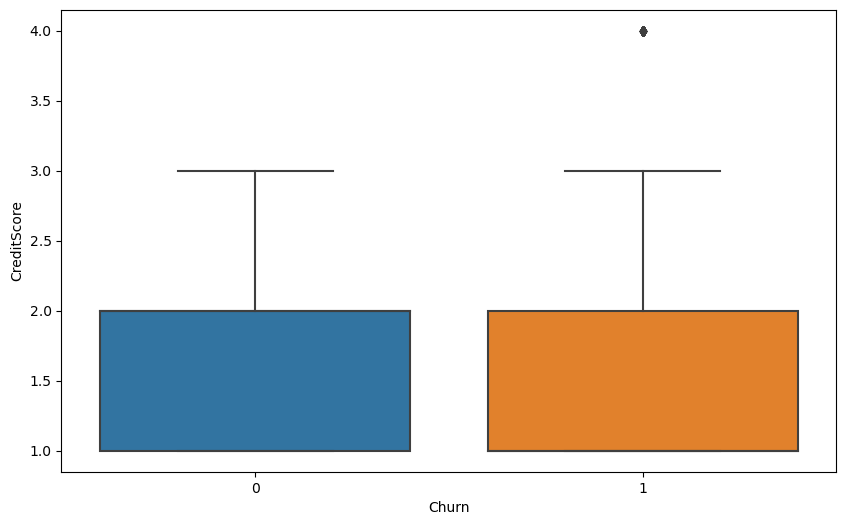

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='NumOfProducts', data=df)
plt.xlabel('Churn')
plt.ylabel('CreditScore')
plt.show() #São outliers

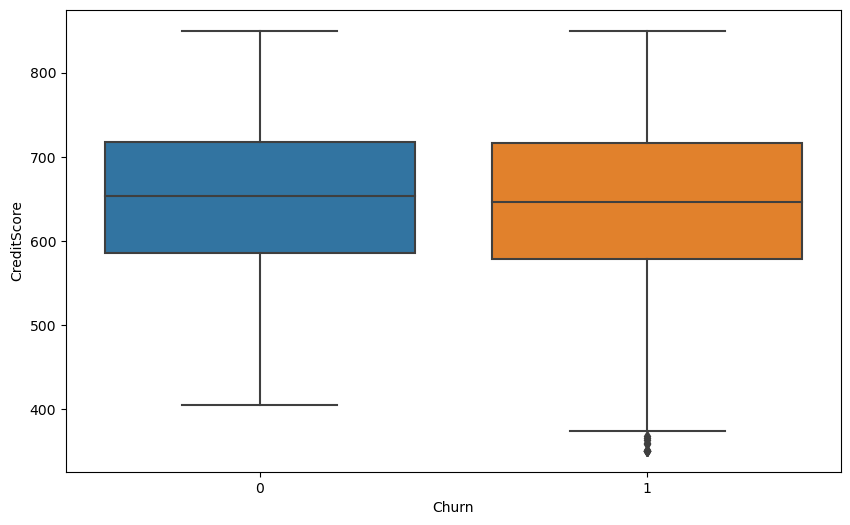

In [78]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.xlabel('Churn')
plt.ylabel('CreditScore')
plt.show()

##### Aparentemente, os credit score baixos em destaque no pairplot são outliers. Será melhor retirá-los.

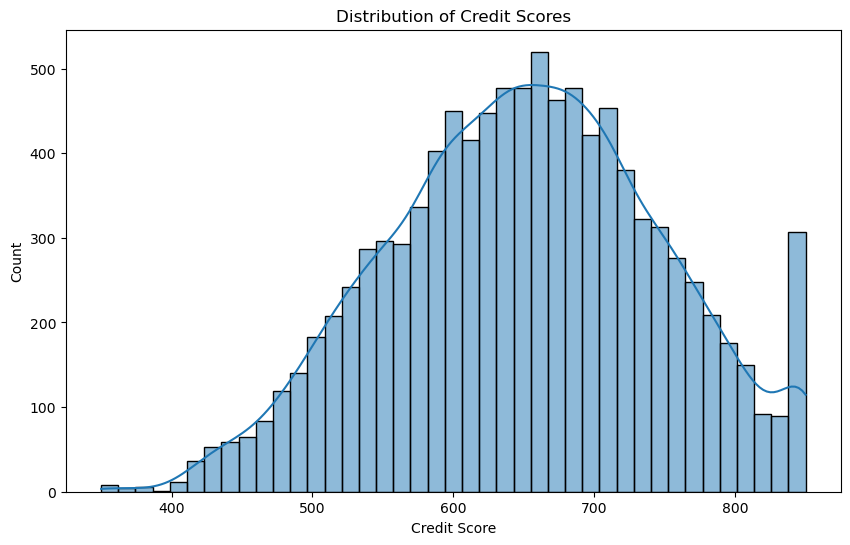

In [81]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CreditScore', kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

In [87]:
Q1 = df['CreditScore'].quantile(0.25)
Q3 = df['CreditScore'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['CreditScore'] < lower_bound) | (df['CreditScore'] > upper_bound)]
print(f'Number of outliers: {len(outliers)}')


Number of outliers: 15


In [90]:
df['outlier'] = (df['CreditScore'] < lower_bound) | (df['CreditScore'] > upper_bound)

In [92]:
df[['CreditScore','outlier']].sort_values(by=['CreditScore'])

,CreditScore,outlier
8762,350,True
8723,350,True
1838,350,True
9624,350,True
1631,350,True
...,...,...
937,850,False
2980,850,False
960,850,False
3109,850,False


### Correlação entre variáveis numericas

In [82]:
df_02 = df[['CreditScore', 'Age','Tenure',  'Balance', 'NumOfProducts', 'EstimatedSalary','Point Earned', 'Exited']]

In [15]:
correlation_matrix = df_02.corr()

In [16]:
correlation_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Point Earned,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384,0.000077,-0.026771
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201,0.002222,0.285296
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784,-0.010196,-0.013656
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797,0.014608,0.118577
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204,-0.015330,-0.047611
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000,-0.001515,0.012490
Point Earned,0.000077,0.002222,-0.010196,0.014608,-0.015330,-0.001515,1.000000,-0.004628
Exited,-0.026771,0.285296,-0.013656,0.118577,-0.047611,0.012490,-0.004628,1.000000


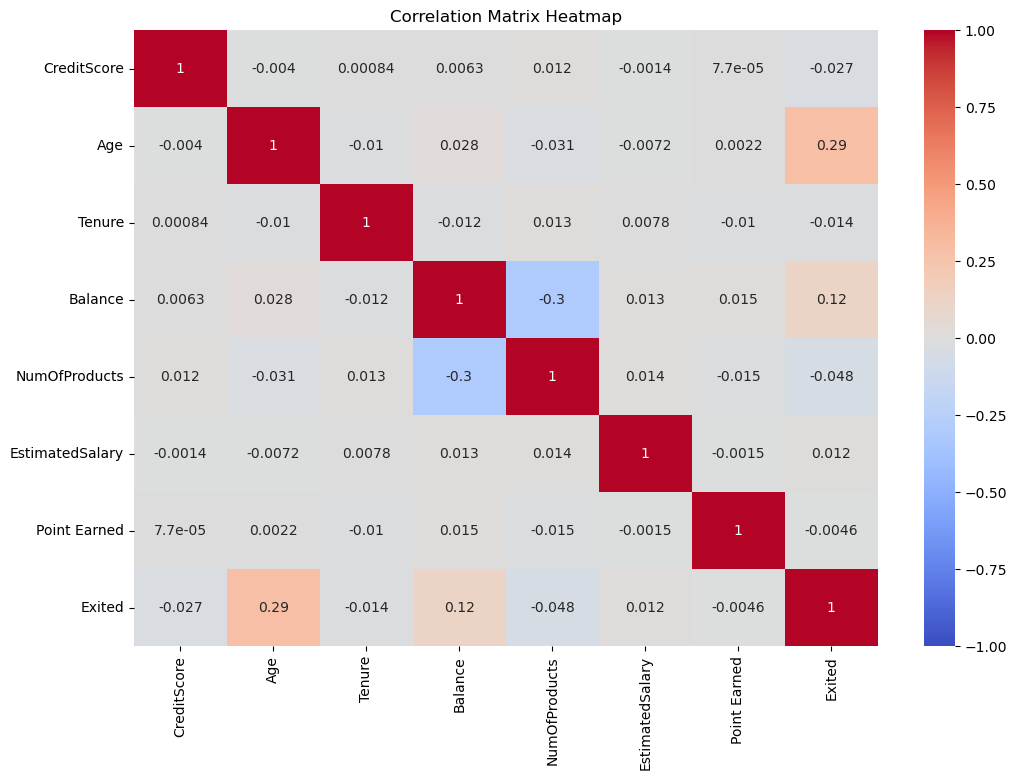

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

Não parece haver grande correlação entre as variáveis numéricas. Pelo que não retiraremos nenhuma por esse motivo.

In [19]:
target_correlations = correlation_matrix['Exited'].sort_values(ascending=False)

In [30]:
target_correlations ## mesma conclusão face à target

Exited             1.000000
Age                0.285296
Balance            0.118577
EstimatedSalary    0.012490
Point Earned      -0.004628
Tenure            -0.013656
CreditScore       -0.026771
NumOfProducts     -0.047611
Name: Exited, dtype: float64

### Variáveis categóricas

In [22]:
df_03 = df[['Geography', 'Gender','HasCrCard','IsActiveMember','Complain','Satisfaction Score','Card Type','Exited']]

In [23]:
df_03

,Geography,Gender,HasCrCard,IsActiveMember,Complain,Satisfaction Score,Card Type,Exited
0,France,Female,1,1,1,2,DIAMOND,1
1,Spain,Female,0,1,1,3,DIAMOND,0
2,France,Female,1,0,1,3,DIAMOND,1
3,France,Female,0,0,0,5,GOLD,0
4,Spain,Female,1,1,0,5,GOLD,0
...,...,...,...,...,...,...,...,...
9995,France,Male,1,0,0,1,DIAMOND,0
9996,France,Male,1,1,0,5,PLATINUM,0
9997,France,Female,0,1,1,3,SILVER,1
9998,Germany,Male,1,0,1,2,GOLD,1


In [25]:
Gender_x = df_03.groupby(['Gender'])['Exited'].value_counts(normalize=True)*100

In [26]:
Gender_x

Gender  Exited
Female  0         74.928461
        1         25.071539
Male    0         83.525747
        1         16.474253
Name: proportion, dtype: float64

In [28]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [37]:
Gender_x.unstack()

Exited,0,1
Gender,,
Female,74.928461,25.071539
Male,83.525747,16.474253


In [38]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [31]:
Geography_x = df_03.groupby(['Geography'])['Exited'].value_counts(normalize=True)*100

In [32]:
Geography_x

Geography  Exited
France     0         83.825289
           1         16.174711
Germany    0         67.556796
           1         32.443204
Spain      0         83.326605
           1         16.673395
Name: proportion, dtype: float64

In [39]:
Geography_x.unstack() #Na Alemanha o abandono é o dobro dos restantes

Exited,0,1
Geography,,
France,83.825289,16.174711
Germany,67.556796,32.443204
Spain,83.326605,16.673395


In [40]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [34]:
HasCrCard_x = df_03.groupby(['HasCrCard'])['Exited'].value_counts(normalize=True)*100

In [35]:
HasCrCard_x

HasCrCard  Exited
0          0         79.185059
           1         20.814941
1          0         79.801559
           1         20.198441
Name: proportion, dtype: float64

In [36]:
HasCrCard_x.unstack() #esquisito

Exited,0,1
HasCrCard,,
0,79.185059,20.814941
1,79.801559,20.198441


Podemos retirar a variável HasCrCard dado que ter cartão ou não ter, parece não influenciar a target.

In [42]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [43]:
IsActiveMember_x = df_03.groupby(['IsActiveMember'])['Exited'].value_counts(normalize=True)*100

In [44]:
IsActiveMember_x

IsActiveMember  Exited
0               0         73.128480
                1         26.871520
1               0         85.730926
                1         14.269074
Name: proportion, dtype: float64

In [46]:
IsActiveMember_x.unstack() #poderiamos esperar que existissem mais saídas dos inativos, mas a diferença não é assim tão grande

Exited,0,1
IsActiveMember,,
0,73.128480,26.871520
1,85.730926,14.269074


In [48]:
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(df['IsActiveMember'], df['Exited'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")

Chi-Square: 243.6948024819593
P-Value: 6.1531674381134086e-55


##### Atendendo ao resultado do chi-Square test, mantemos a variavel.

In [53]:
df['Complain'].value_counts()

Complain
0    7956
1    2044
Name: count, dtype: int64

In [55]:
Complain_x = df_03.groupby(['Complain'])['Exited'].value_counts(normalize=True)*100

In [56]:
Complain_x

Complain  Exited
0         0         99.949723
          1          0.050277
1         1         99.510763
          0          0.489237
Name: proportion, dtype: float64

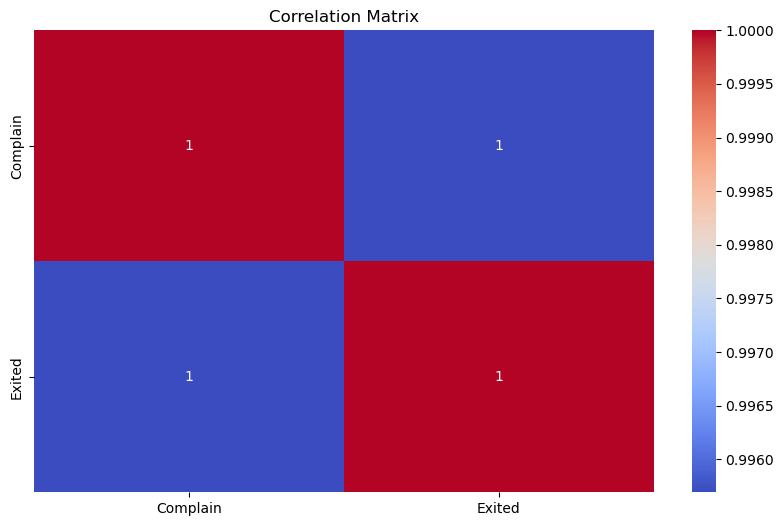

In [58]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Complain', 'Exited']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### Podemos descartar a variável Complain, está altamente correlacionada com a target.

In [59]:
df['Satisfaction Score'].value_counts()

Satisfaction Score
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64

In [60]:
Satisfaction_Score_x = df_03.groupby(['Satisfaction Score'])['Exited'].value_counts(normalize=True)*100
Satisfaction_Score_x

Satisfaction Score  Exited
1                   0         79.968944
                    1         20.031056
2                   0         78.202582
                    1         21.797418
3                   0         80.362390
                    1         19.637610
4                   0         79.382470
                    1         20.617530
5                   0         80.189621
                    1         19.810379
Name: proportion, dtype: float64

In [61]:
df['Card Type'].value_counts()

Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

In [62]:
Card_Type_x= df_03.groupby(['Card Type'])['Exited'].value_counts(normalize=True)*100
Card_Type_x

Card Type  Exited
DIAMOND    0         78.220981
           1         21.779019
GOLD       0         80.735412
           1         19.264588
PLATINUM   0         79.639279
           1         20.360721
SILVER     0         79.887821
           1         20.112179
Name: proportion, dtype: float64

##### Sobre as variáveis categoricas, podemos excluir 'Complain'. Em 'Geography' verificamos alguma diferença. As restantes encontram-se estranhamente equilibradas.

### Relação entre variaveis numericas e categoricas

In [96]:
df_rel_var = df[['Geography', 'Gender','IsActiveMember','Satisfaction Score','Card Type','Exited',
                'CreditScore', 'Age','Tenure',  'Balance', 'NumOfProducts', 'EstimatedSalary','Point Earned']]
df_rel_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Geography           10000 non-null  object 
 1   Gender              10000 non-null  object 
 2   IsActiveMember      10000 non-null  int64  
 3   Satisfaction Score  10000 non-null  int64  
 4   Card Type           10000 non-null  object 
 5   Exited              10000 non-null  int64  
 6   CreditScore         10000 non-null  int64  
 7   Age                 10000 non-null  int64  
 8   Tenure              10000 non-null  int64  
 9   Balance             10000 non-null  float64
 10  NumOfProducts       10000 non-null  int64  
 11  EstimatedSalary     10000 non-null  float64
 12  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


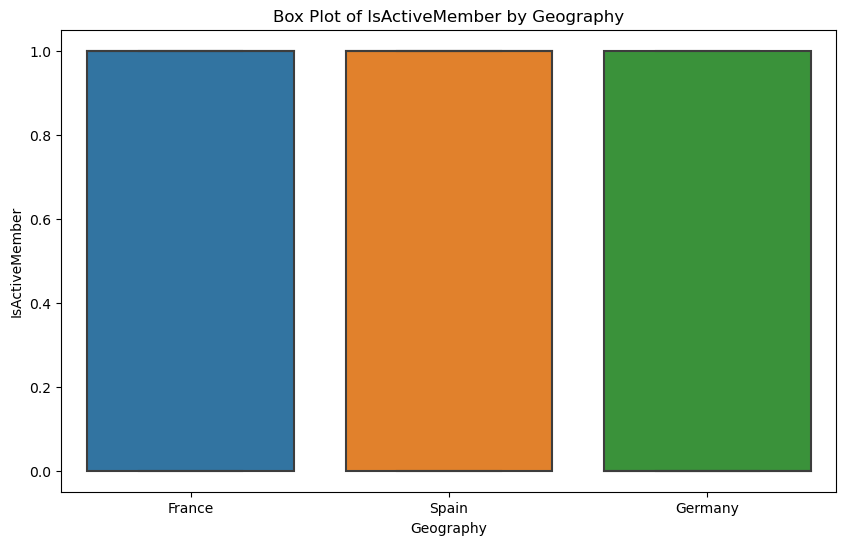

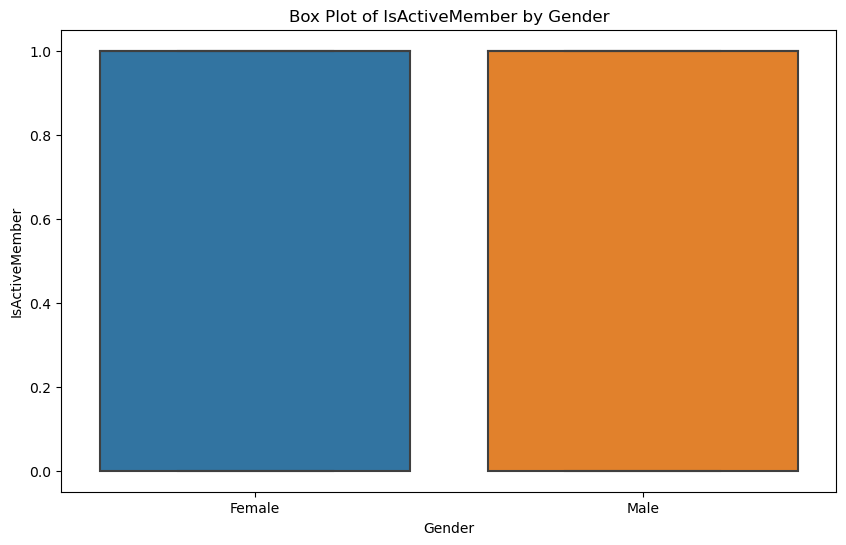

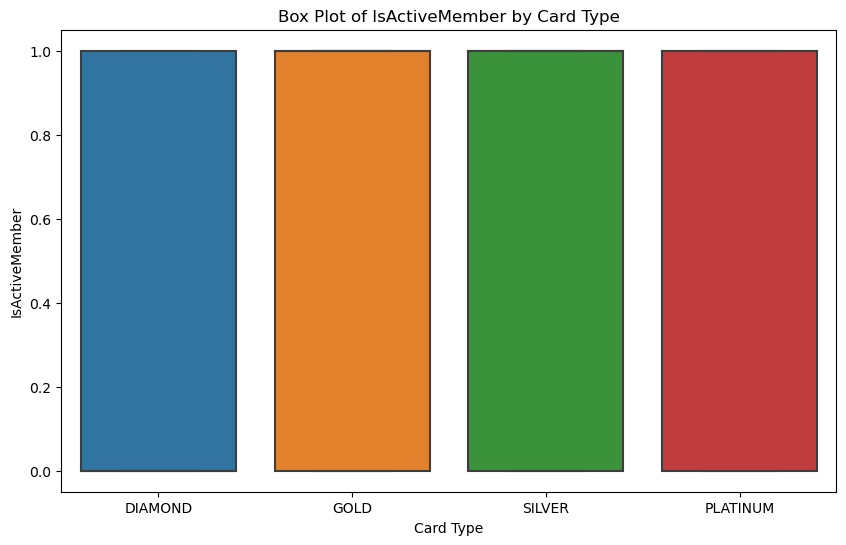

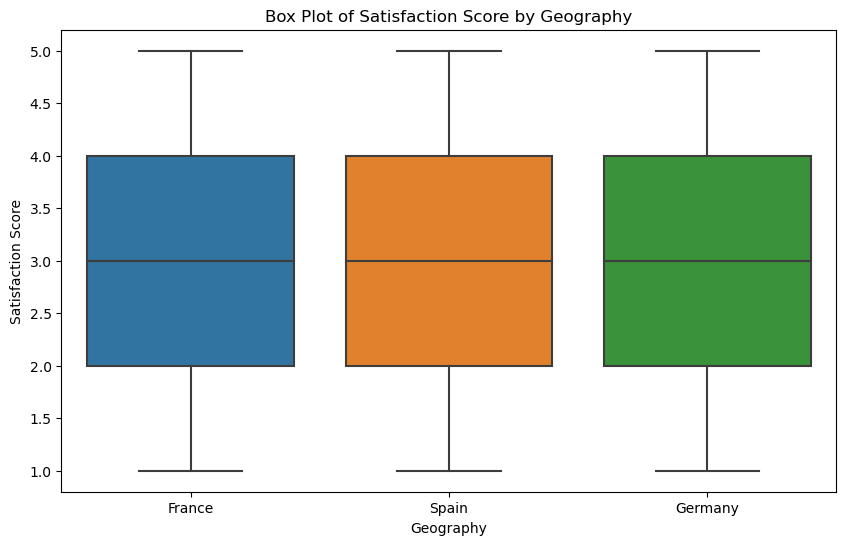

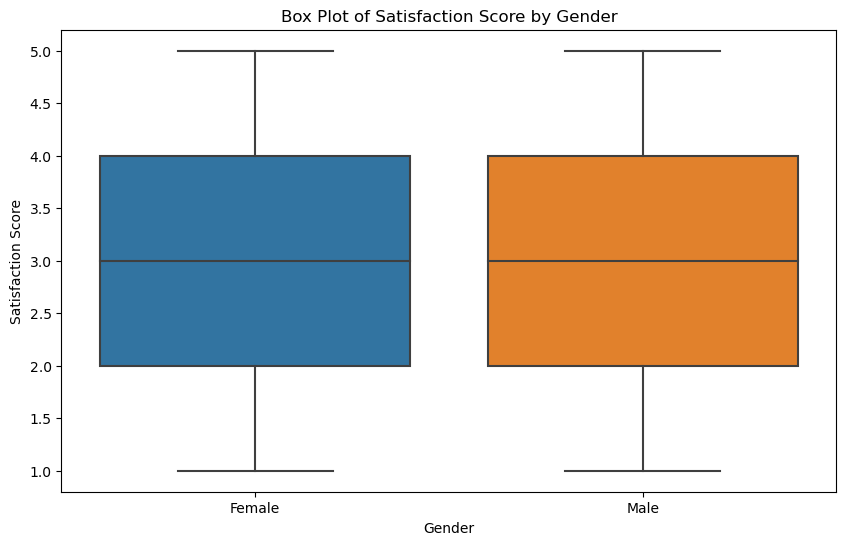

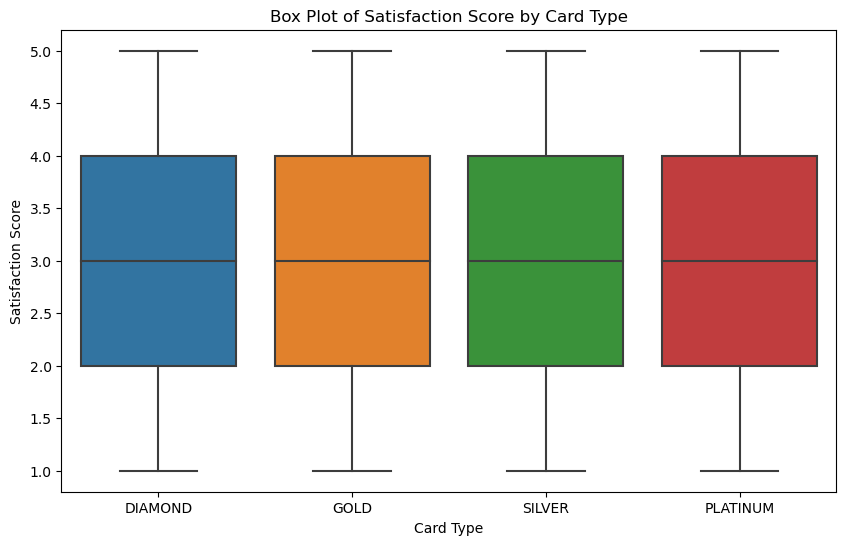

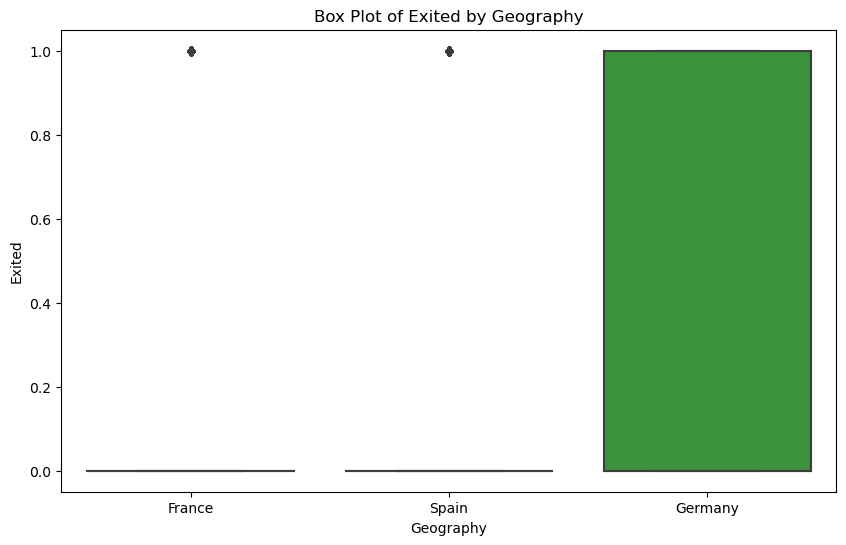

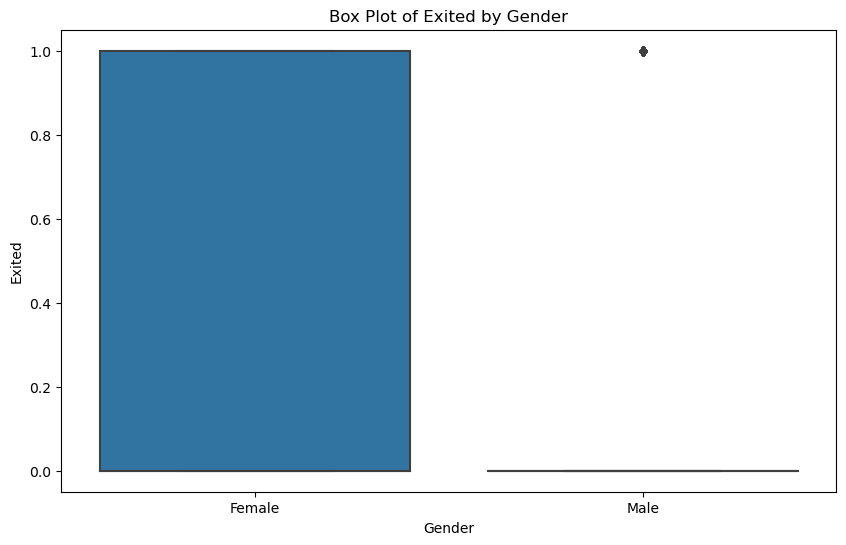

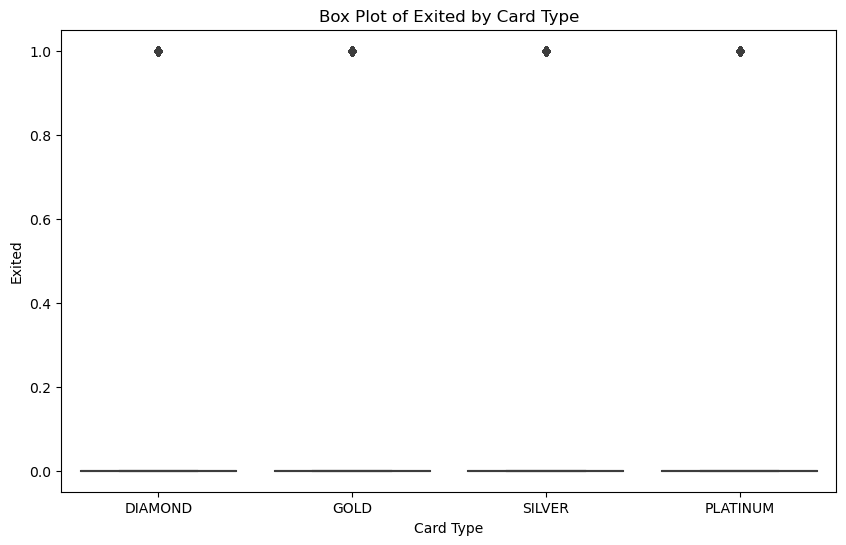

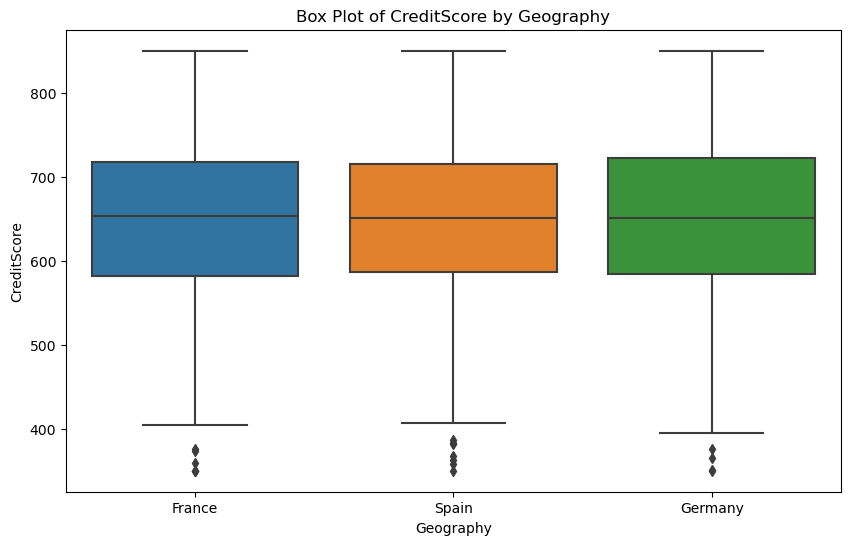

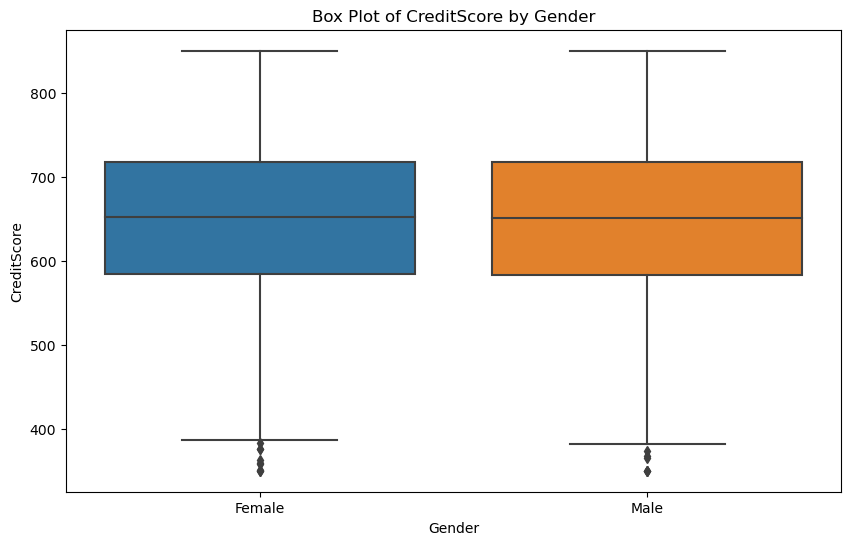

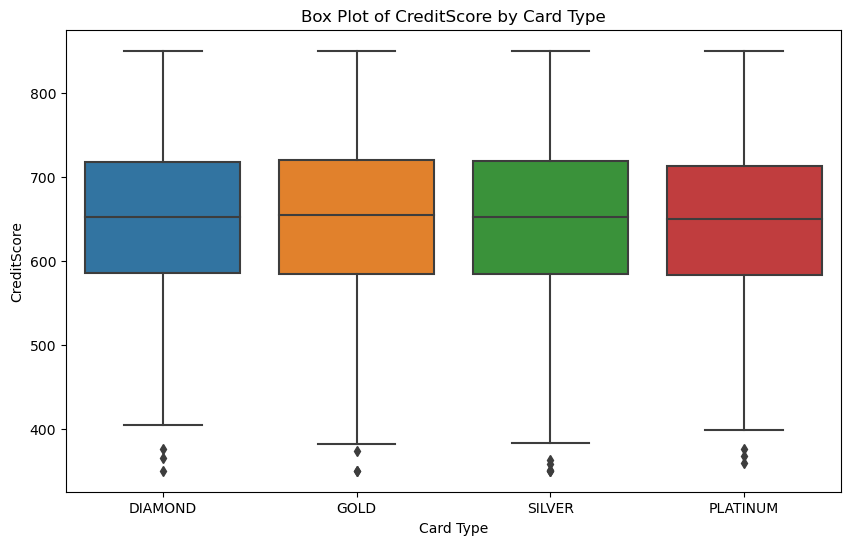

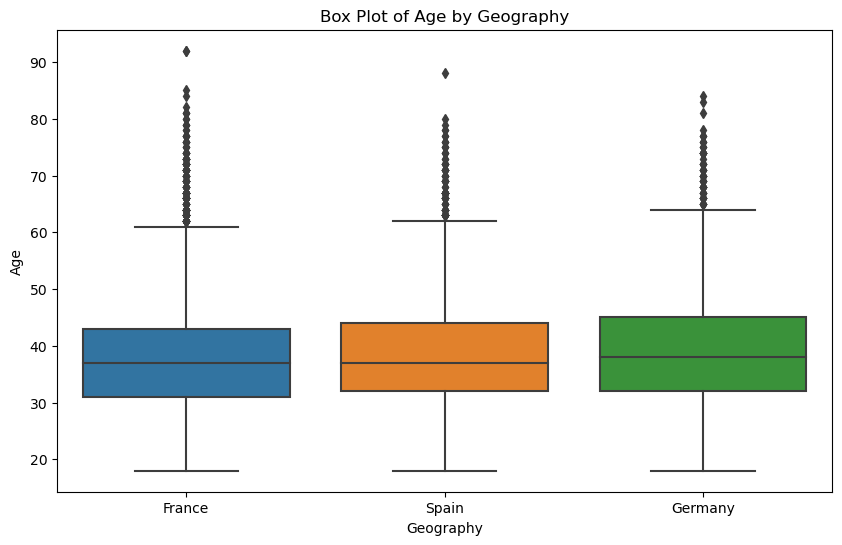

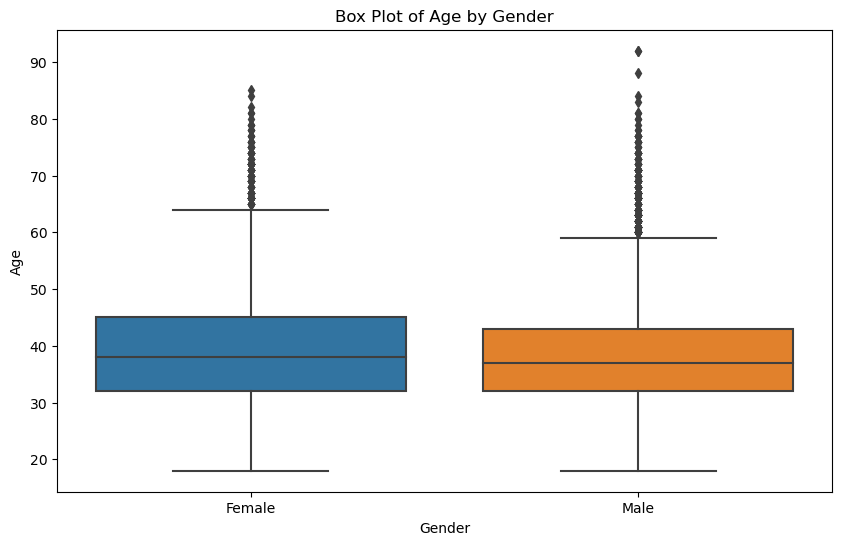

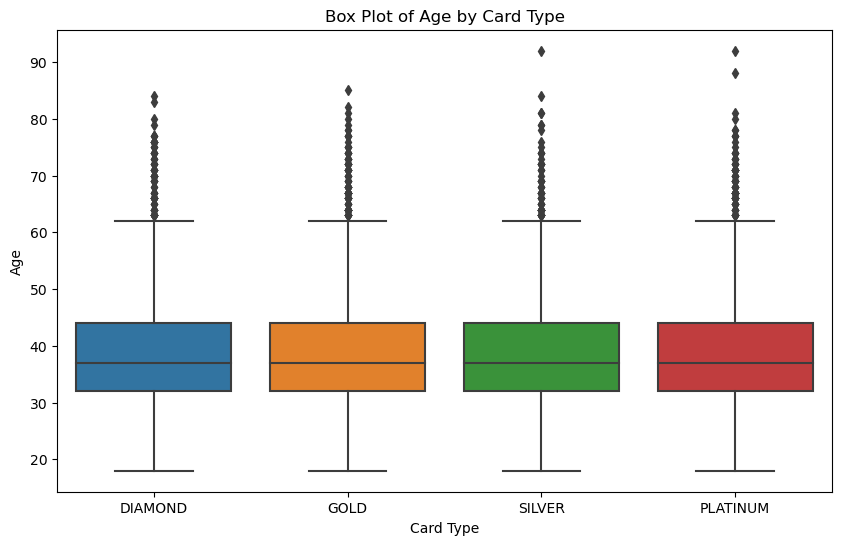

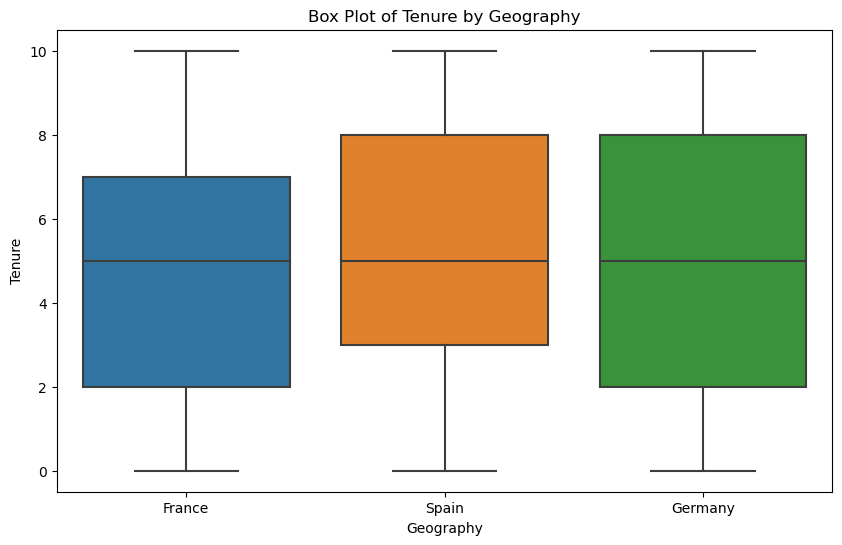

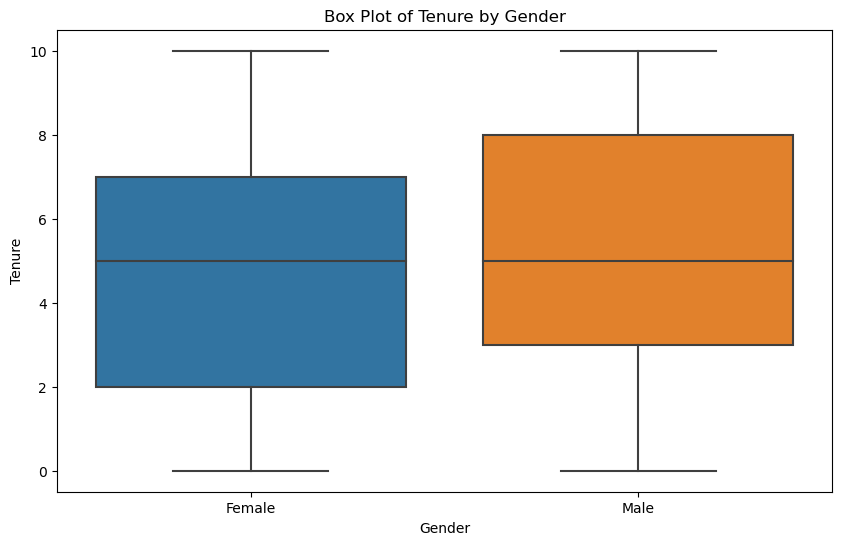

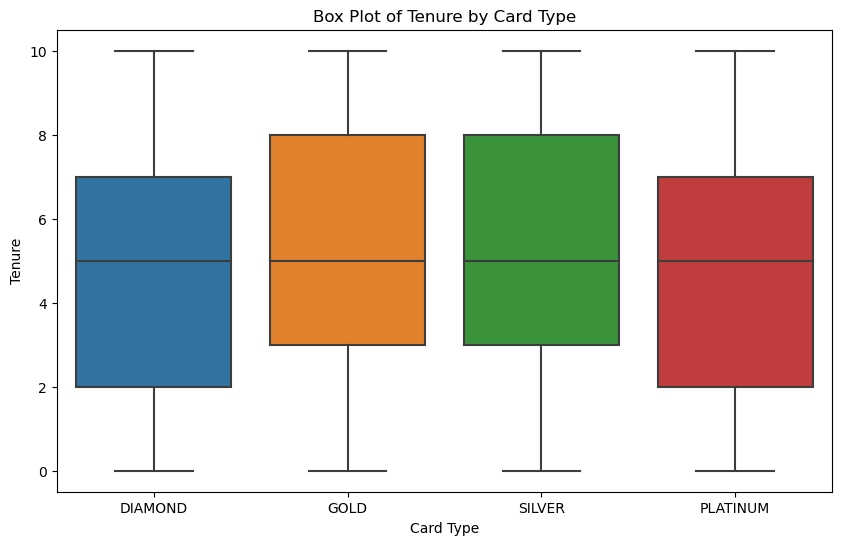

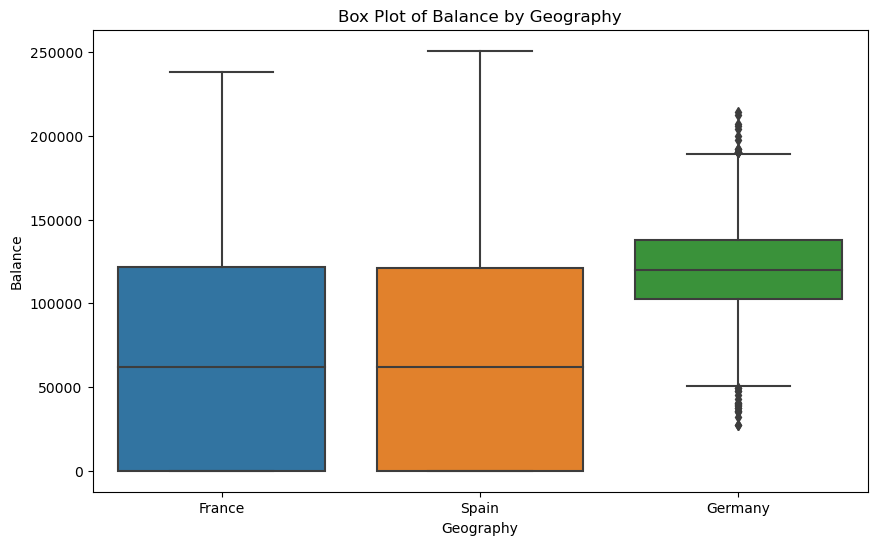

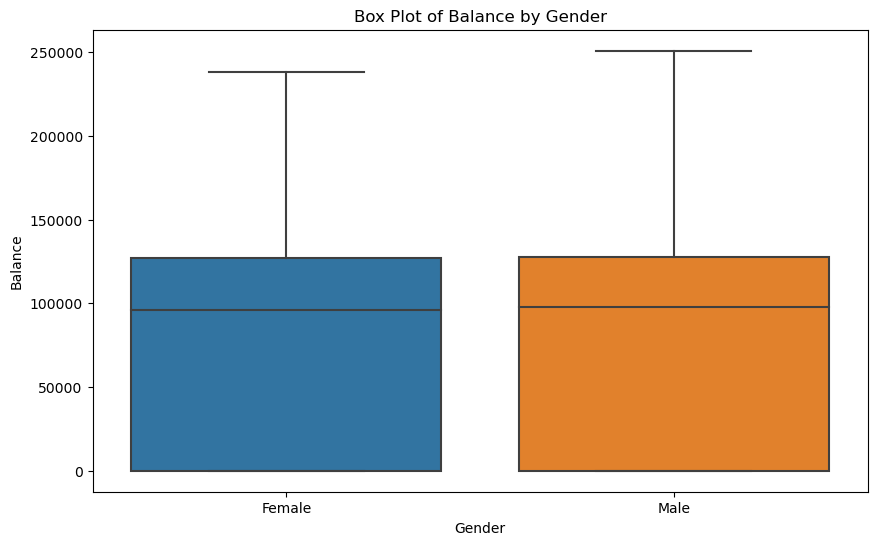

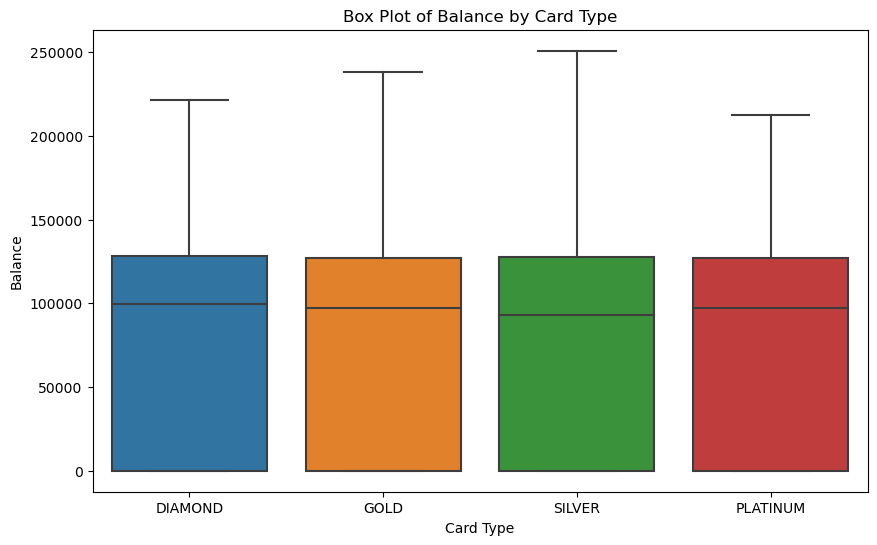

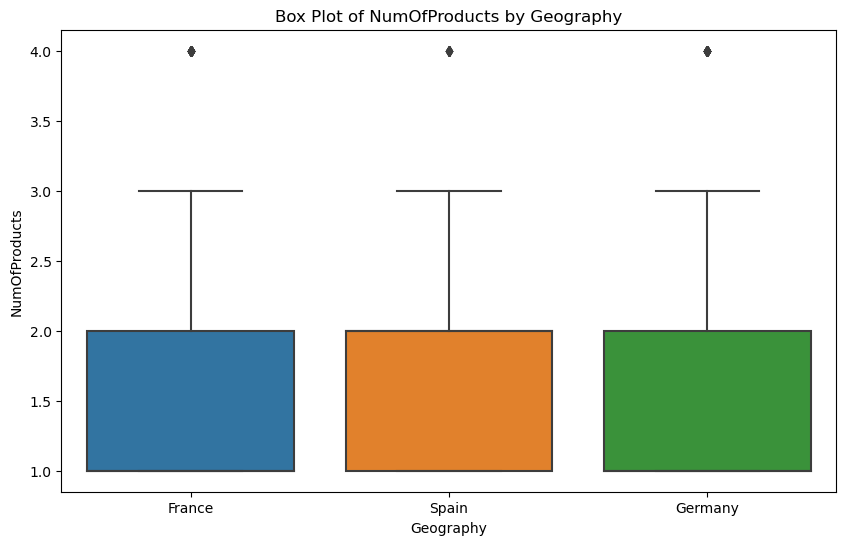

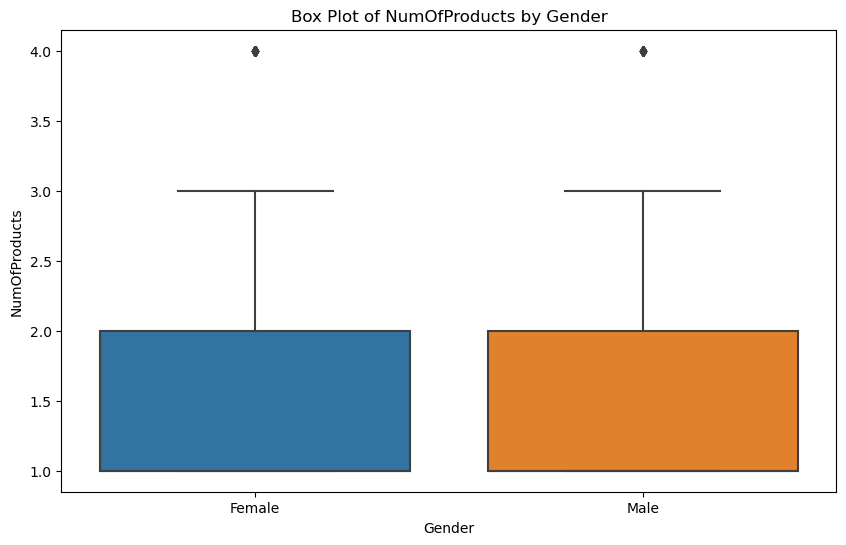

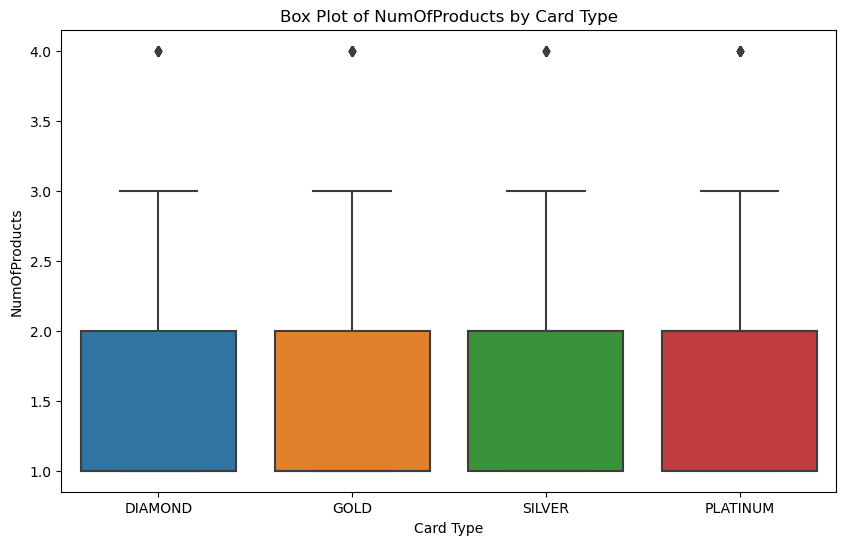

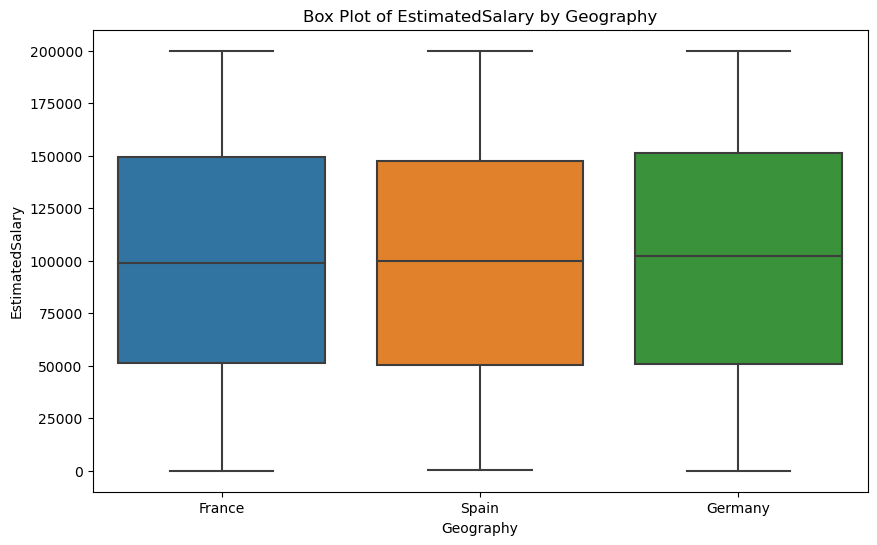

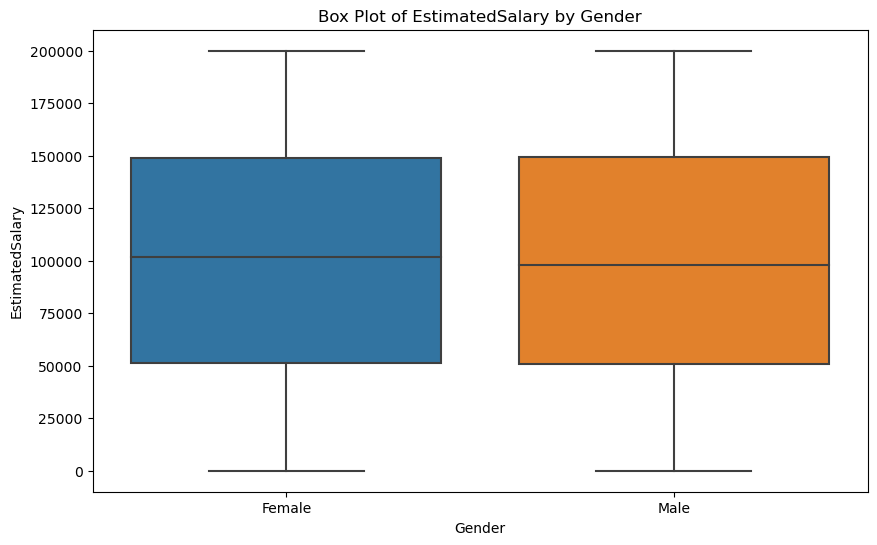

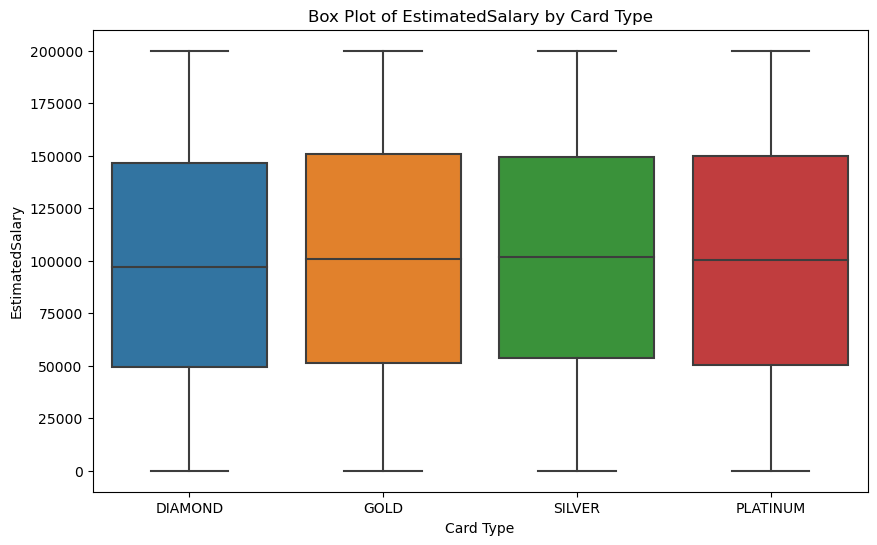

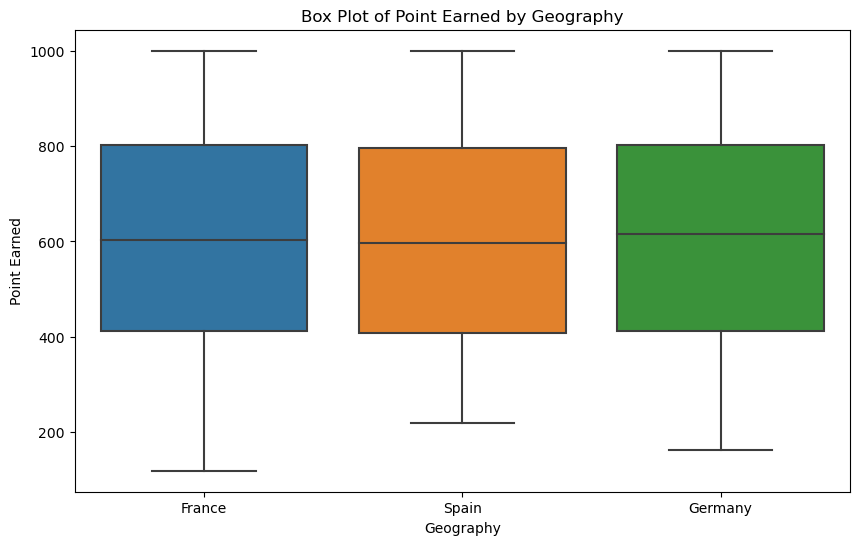

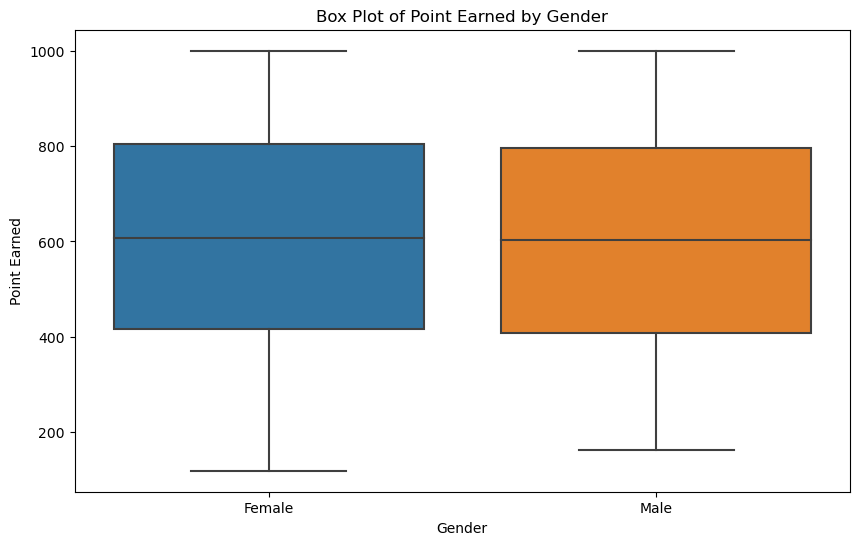

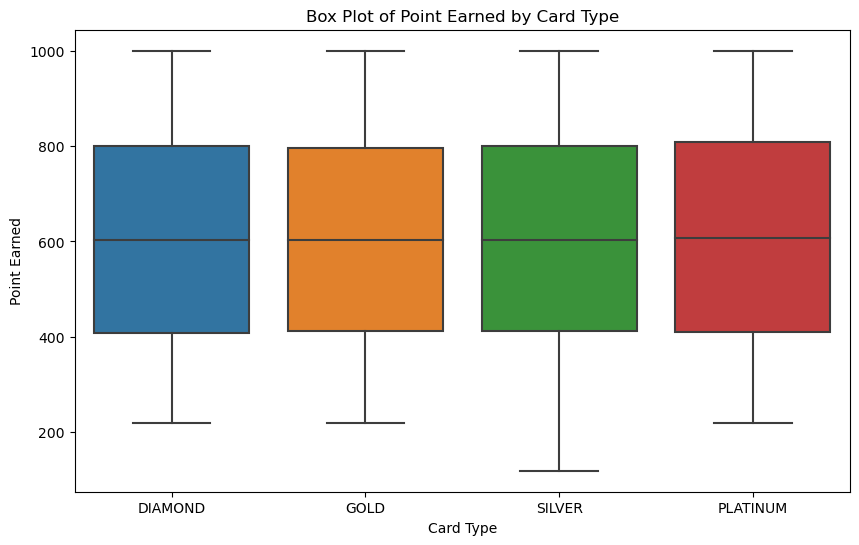

In [97]:
for num_col in df_rel_var.select_dtypes(include=['float64', 'int64']).columns:
    for cat_col in df_rel_var.select_dtypes(include=['object', 'category']).columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_col, y=num_col, data=df)
        plt.title(f'Box Plot of {num_col} by {cat_col}')
        plt.show()